In [249]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns

In [296]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely import wkt

In [113]:
from sklearn.cluster import KMeans

In [114]:
vul = pd.read_csv('data/out/v.csv')

In [116]:
infra = pd.read_csv('data/out/infra.csv')

##### Import a geopandas dataframe and pass crs to final geopandas df below

In [278]:
tr_treestats = gpd.GeoDataFrame.from_file('data/out/tracts_treestats.geojson')

In [279]:
coords = tr_treestats.crs

In [289]:
tr_treestats.geometry

0       MULTIPOLYGON (((-118.41663 32.79555, -118.4165...
1       MULTIPOLYGON (((-117.97659 33.90282, -117.9765...
2       MULTIPOLYGON (((-118.88954 34.81790, -118.8847...
3       MULTIPOLYGON (((-118.65862 34.17142, -118.6584...
4       MULTIPOLYGON (((-118.21630 33.90339, -118.2153...
                              ...                        
2528    MULTIPOLYGON (((-118.33698 34.10837, -118.3369...
2529    MULTIPOLYGON (((-118.32676 34.11112, -118.3267...
2530    MULTIPOLYGON (((-118.21897 34.14000, -118.2173...
2531    MULTIPOLYGON (((-117.93305 33.94609, -117.9330...
2532    MULTIPOLYGON (((-118.12345 33.78715, -118.1222...
Name: geometry, Length: 2533, dtype: geometry

### Testing k-means clustering with simplified dataframe: interesting to discover the dependency among variables!

In [117]:
test = infra[['tree_median', 'impv_median']].copy()

In [118]:
test = test.dropna(axis="rows", how="any")

In [119]:
test

,tree_median,impv_median
0,0.0,0.0
2,0.0,43.0
3,6.0,46.0
4,0.0,69.0
5,0.0,65.0
...,...,...
2527,0.0,78.0
2528,8.0,46.0
2529,12.0,29.0
2530,0.0,64.0


In [120]:
test.describe()

,tree_median,impv_median
count,2517.000000,2517.000000
mean,0.894319,61.227056
std,2.922549,21.785420
min,0.000000,0.000000
25%,0.000000,54.000000
50%,0.000000,65.000000
75%,0.000000,75.000000
max,23.000000,99.000000


In [121]:
wcss = []

In [122]:
for i in range(1,11):
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(test)
    wcss.append(km.inertia_)

### Plot elbow curve

In [123]:
sns.set()

<function matplotlib.pyplot.show(close=None, block=None)>

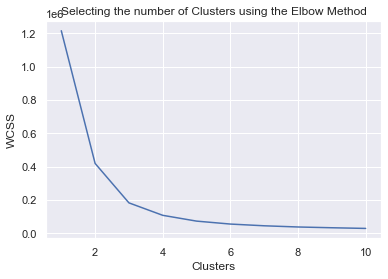

In [124]:
plt.plot(range(1,11), wcss)
plt.title('Selecting the number of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show

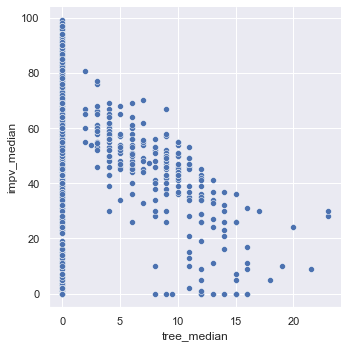

In [125]:
sns.relplot(x='tree_median', y='impv_median', data=test);

### Integrate the vulnerability variable with an ecological input(s): tree canopy + elevation

#### Join the two dataframes on GEOID

In [126]:
infra.dropna(axis="rows", how="any")

,Unnamed: 0,TRACTCE,GEOID,NAME,INTPTLAT,INTPTLON,tree_median,land_majority,impv_median,dem_median,geometry
0,0,599100,6037599100,5991.00,32.925570,-118.497290,0.0,52.0,0.0,209.065842,MULTIPOLYGON (((-118.4166287644724 32.79555493...
2,2,3308,6029003308,33.08,34.843283,-118.989749,0.0,22.0,43.0,1184.765869,MULTIPOLYGON (((-118.8895438238539 34.81790328...
3,3,137000,6037137000,1370.00,34.166115,-118.640235,6.0,22.0,46.0,277.154663,"MULTIPOLYGON (((-118.658618 34.171419, -118.65..."
4,4,541605,6037541605,5416.05,33.899344,-118.210002,0.0,23.0,69.0,21.491051,"MULTIPOLYGON (((-118.216298 33.903393, -118.21..."
5,5,541801,6037541801,5418.01,33.911804,-118.194675,0.0,23.0,65.0,24.059566,"MULTIPOLYGON (((-118.199979 33.906677, -118.19..."
...,...,...,...,...,...,...,...,...,...,...,...
2527,2527,480902,6037480902,4809.02,34.080280,-118.138926,0.0,23.0,78.0,138.816193,"MULTIPOLYGON (((-118.144962 34.0808, -118.1447..."
2528,2528,189600,6037189600,1896.00,34.111260,-118.329799,8.0,23.0,46.0,160.689148,"MULTIPOLYGON (((-118.336981 34.10837, -118.336..."
2529,2529,189400,6037189400,1894.00,34.120081,-118.321143,12.0,22.0,29.0,231.918854,"MULTIPOLYGON (((-118.32676 34.111124, -118.326..."
2530,2530,181400,6037181400,1814.00,34.136719,-118.208874,0.0,23.0,64.0,179.166840,"MULTIPOLYGON (((-118.218967 34.139997, -118.21..."


In [127]:
vul = vul.rename(columns = {'CensusTract': 'GEOID'})
vul

,Unnamed: 0,ZIP,GEOID,geometry,vul
0,0,91356.0,6037139301,"MULTIPOLYGON (((-118.571496 34.177579, -118.57...",0.176189
1,1,91356.0,6037139302,"MULTIPOLYGON (((-118.540734 34.180195, -118.54...",-0.597622
2,2,91316.0,6037139502,"MULTIPOLYGON (((-118.532245 34.16201, -118.531...",0.248734
3,3,91316.0,6037139600,"MULTIPOLYGON (((-118.518583 34.158576, -118.51...",0.448743
4,4,91436.0,6037139701,"MULTIPOLYGON (((-118.5098 34.156908, -118.5084...",0.755947
...,...,...,...,...,...
2340,8048,90004.0,6037192700,"MULTIPOLYGON (((-118.29171 34.083588, -118.290...",-0.581355
2341,8049,90048.0,6037194500,"MULTIPOLYGON (((-118.378802 34.07639, -118.378...",0.255105
2342,8050,90039.0,6037195100,"MULTIPOLYGON (((-118.276908 34.095835, -118.27...",0.626143
2343,8051,90027.0,6037195300,"MULTIPOLYGON (((-118.29177 34.10178, -118.2895...",0.337343


In [128]:
test2 = pd.merge(infra, vul, how ='inner', on = 'GEOID', sort = False, 
                 copy = True, indicator = False, validate = None).dropna(axis="rows", how="any")
test2

,Unnamed: 0_x,TRACTCE,GEOID,NAME,INTPTLAT,INTPTLON,tree_median,land_majority,impv_median,dem_median,geometry_x,Unnamed: 0_y,ZIP,geometry_y,vul
1,4,541605,6037541605,5416.05,33.899344,-118.210002,0.0,23.0,69.0,21.491051,"MULTIPOLYGON (((-118.216298 33.903393, -118.21...",2570,90221.0,"MULTIPOLYGON (((-118.216298 33.903393, -118.21...",-0.585446
2,5,541801,6037541801,5418.01,33.911804,-118.194675,0.0,23.0,65.0,24.059566,"MULTIPOLYGON (((-118.199979 33.906677, -118.19...",2571,90262.0,"MULTIPOLYGON (((-118.199979 33.906677, -118.19...",-0.516531
3,6,541802,6037541802,5418.02,33.909880,-118.186675,0.0,23.0,62.0,23.952244,"MULTIPOLYGON (((-118.19359 33.906542, -118.193...",2582,90262.0,"MULTIPOLYGON (((-118.193753 33.906147, -118.19...",-0.426446
4,7,542000,6037542000,5420.00,33.905571,-118.203158,0.0,23.0,60.0,22.920475,"MULTIPOLYGON (((-118.207337 33.907321, -118.20...",2583,90221.0,"MULTIPOLYGON (((-118.207337 33.907321, -118.20...",-0.498291
5,8,573800,6037573800,5738.00,33.824212,-118.098412,0.0,23.0,58.0,9.876221,"MULTIPOLYGON (((-118.109003 33.819121, -118.10...",2604,90808.0,"MULTIPOLYGON (((-118.109003 33.819121, -118.10...",0.458502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2526,300501,6037300501,3005.01,34.220689,-118.240049,0.0,23.0,52.0,448.684265,"MULTIPOLYGON (((-118.248753 34.222495, -118.24...",6402,91214.0,"MULTIPOLYGON (((-118.248753 34.222495, -118.24...",0.443941
2013,2527,480902,6037480902,4809.02,34.080280,-118.138926,0.0,23.0,78.0,138.816193,"MULTIPOLYGON (((-118.144962 34.0808, -118.1447...",3043,91803.0,"MULTIPOLYGON (((-118.146905 34.079705, -118.14...",-0.129946
2014,2528,189600,6037189600,1896.00,34.111260,-118.329799,8.0,23.0,46.0,160.689148,"MULTIPOLYGON (((-118.336981 34.10837, -118.336...",3045,90068.0,"MULTIPOLYGON (((-118.336981 34.10837, -118.336...",-0.215253
2015,2529,189400,6037189400,1894.00,34.120081,-118.321143,12.0,22.0,29.0,231.918854,"MULTIPOLYGON (((-118.32676 34.111124, -118.326...",3046,90068.0,"MULTIPOLYGON (((-118.32676 34.111124, -118.326...",0.508082


In [238]:
test2.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2006, 2007, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=1968)

In [188]:
test2.describe()

,Unnamed: 0_x,TRACTCE,GEOID,NAME,INTPTLAT,INTPTLON,tree_median,land_majority,impv_median,dem_median,Unnamed: 0_y,ZIP,vul
count,1968.000000,1968.000000,1.968000e+03,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000
mean,1229.635671,390599.259146,6.037391e+09,3905.992591,34.061544,-118.254144,0.905488,24.762195,62.431148,151.319366,3912.806402,90814.250508,-0.150855
std,790.831051,214227.442831,2.142274e+05,2142.274428,0.169277,0.184833,2.930210,7.259820,19.979844,162.393292,2326.760908,774.812770,0.519170
min,4.000000,101110.000000,6.037101e+09,1011.100000,33.708857,-118.861046,0.000000,21.000000,0.000000,2.215571,0.000000,90001.000000,-1.543588
25%,533.750000,208583.000000,6.037209e+09,2085.830000,33.958250,-118.379853,0.000000,23.000000,55.500000,39.275841,2084.750000,90061.000000,-0.563455
50%,1093.500000,403317.500000,6.037403e+09,4033.175000,34.053994,-118.271735,0.000000,23.000000,66.000000,94.564880,3330.500000,90706.000000,-0.197317
75%,2027.250000,543305.250000,6.037543e+09,5433.052500,34.149180,-118.145535,0.000000,23.000000,75.000000,224.728504,5834.250000,91354.000000,0.259449
max,2530.000000,920339.000000,6.037920e+09,9203.390000,34.746448,-117.713487,23.000000,81.000000,99.000000,1074.378174,8056.000000,93591.000000,1.377370


In [212]:
wcss2 = []

In [213]:
infra_vul = test2[['vul', 'tree_median','land_majority', 'impv_median','dem_median']]

In [214]:
for i in range(1,11):
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(infra_vul)
    wcss2.append(km.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

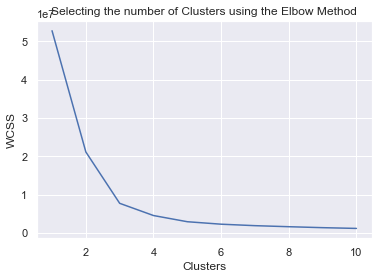

In [215]:
plt.plot(range(1,11), wcss2)
plt.title('Selecting the number of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show

In [217]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(infra_vul)
y_kmeans = kmeans.predict(infra_vul)

In [219]:
infra_vul['cluster'] = pd.Series(y_kmeans, index=infra_vul.index)

/var/folders/22/w9k9dn754d7bwv89pbvgxw080000gn/T/ipykernel_2744/136682810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infra_vul['cluster'] = pd.Series(y_kmeans, index=infra_vul.index)


In [239]:
infra_vul.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2006, 2007, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=1968)

In [220]:
print(infra_vul)

           vul  tree_median  land_majority  impv_median  dem_median  cluster
1    -0.585446          0.0           23.0         69.0   21.491051        2
2    -0.516531          0.0           23.0         65.0   24.059566        2
3    -0.426446          0.0           23.0         62.0   23.952244        2
4    -0.498291          0.0           23.0         60.0   22.920475        2
5     0.458502          0.0           23.0         58.0    9.876221        2
...        ...          ...            ...          ...         ...      ...
2012  0.443941          0.0           23.0         52.0  448.684265        0
2013 -0.129946          0.0           23.0         78.0  138.816193        2
2014 -0.215253          8.0           23.0         46.0  160.689148        2
2015  0.508082         12.0           22.0         29.0  231.918854        0
2016  0.239630          0.0           23.0         64.0  179.166840        0

[1968 rows x 6 columns]


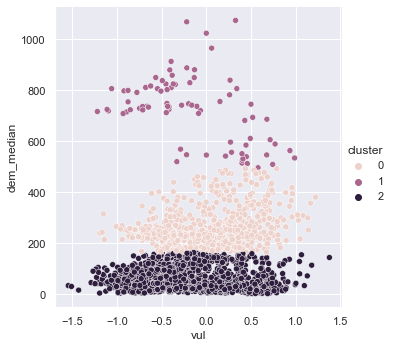

In [221]:
sns.relplot(x='vul', y='dem_median', hue = 'cluster', data=infra_vul)

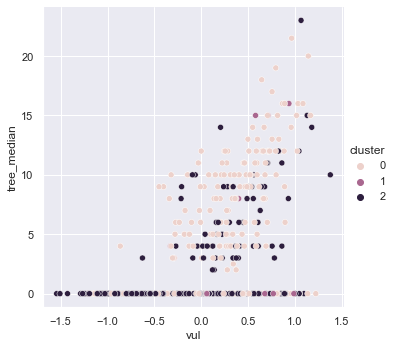

In [222]:
sns.relplot(x='vul', y='tree_median', hue = 'cluster', data=infra_vul)

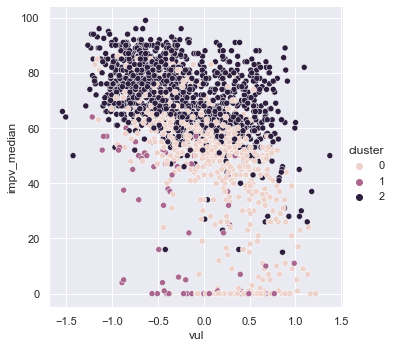

In [223]:
sns.relplot(x='vul', y='impv_median', hue = 'cluster', data=infra_vul)

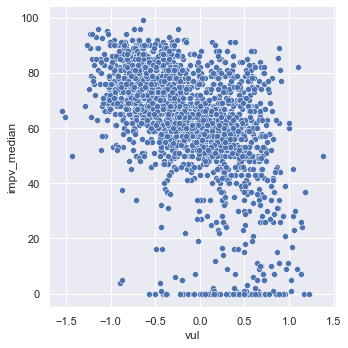

In [224]:
sns.relplot(x='vul', y='impv_median', data=infra_vul);

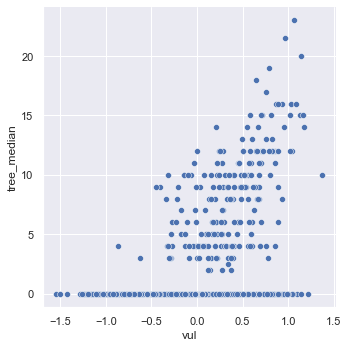

In [225]:
sns.relplot(x='vul', y='tree_median', data=infra_vul);

### Join pandas dataframe back to geometry and convert to geopandas

##### Left: vul; right: infra_vul w/clusters

In [240]:
merged = pd.merge(test2, infra_vul)

In [251]:
merged = GeoDataFrame(merged)

In [270]:
type(merged)

geopandas.geodataframe.GeoDataFrame

In [303]:
choro = merged[['GEOID', 'tree_median', 'land_majority', 'impv_median', 'dem_median', 'vul', 'cluster', 'geometry_x']]
choro = chloro.rename(columns = {'geometry_x': 'geometry'})
choro

,GEOID,tree_median,land_majority,impv_median,dem_median,vul,cluster,geometry
0,6037541605,0.0,23.0,69.0,21.491051,-0.585446,2,"MULTIPOLYGON (((-118.216298 33.903393, -118.21..."
1,6037541801,0.0,23.0,65.0,24.059566,-0.516531,2,"MULTIPOLYGON (((-118.199979 33.906677, -118.19..."
2,6037541802,0.0,23.0,62.0,23.952244,-0.426446,2,"MULTIPOLYGON (((-118.19359 33.906542, -118.193..."
3,6037542000,0.0,23.0,60.0,22.920475,-0.498291,2,"MULTIPOLYGON (((-118.207337 33.907321, -118.20..."
4,6037573800,0.0,23.0,58.0,9.876221,0.458502,2,"MULTIPOLYGON (((-118.109003 33.819121, -118.10..."
...,...,...,...,...,...,...,...,...
1963,6037300501,0.0,23.0,52.0,448.684265,0.443941,0,"MULTIPOLYGON (((-118.248753 34.222495, -118.24..."
1964,6037480902,0.0,23.0,78.0,138.816193,-0.129946,2,"MULTIPOLYGON (((-118.144962 34.0808, -118.1447..."
1965,6037189600,8.0,23.0,46.0,160.689148,-0.215253,2,"MULTIPOLYGON (((-118.336981 34.10837, -118.336..."
1966,6037189400,12.0,22.0,29.0,231.918854,0.508082,0,"MULTIPOLYGON (((-118.32676 34.111124, -118.326..."


In [304]:
choro = GeoDataFrame(choro)

In [305]:
choro['geometry'] = choro['geometry'].apply(wkt.loads)

### Use @perrygeo workaround to convert pd to gpd

In [306]:
choro.__class__ = gpd.GeoDataFrame
choro.crs = {}
choro.set_geometry('geometry')
choro.to_file('data/out/choro.geojson', driver="GeoJSON")

<AxesSubplot:>

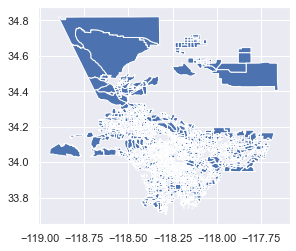

In [307]:
choro.plot()

/var/folders/22/w9k9dn754d7bwv89pbvgxw080000gn/T/ipykernel_2744/1473614639.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(sm)


<AxesSubplot:title={'center':'Clustered Los Angeles Census Tracts'}>

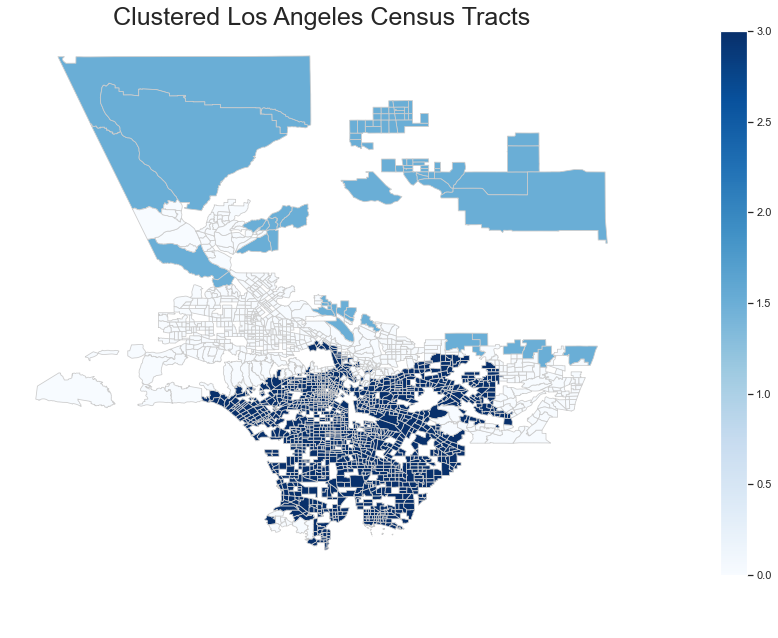

In [308]:
# set the value column that will be visualised
variable = 'cluster'

# set the range for the choropleth values
vmin, vmax = 0, 3

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('Clustered Los Angeles Census Tracts', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Data Sources: MRLC.gov and https://healthyplacesindex.org/', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it

# add the colorbar to the figure
fig.colorbar(sm)
# create map
choro.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')